In [1]:
from spore.mock.mock_ps_foregrounds import visibility_covariance, PoissonProcessForegrounds, ClusteredForegroundsOnly, ClusteredForegrounds,PowerLawSourceCounts, CircularGaussian
from spore.model.source_counts import MultiPowerLawSourceCounts
from spore.visualise.power_spectra import plot_2D_PS, plot_2D_PS_compare, plot_2D_PS_ratio_diff, plot_2D_PS_frac_tot, plot_sig_to_noise_compare
from spore.model.spectral_index import UniversalDist, NormalDist

from astropy.cosmology import Planck15
from astropy import units as un
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
%matplotlib inline

import numpy as np

import cPickle as pickle

import tqdm

In [2]:
u0 = 0.02
kappa = 1.5

nu1 = 1.25
nu2 = 1.5

sc = PowerLawSourceCounts(nu=[1.,nu1,nu2],Smax0=1e0,Smin0=1e-1,alpha=6998.,beta=1.54)
bm = CircularGaussian(150.,nu=[1.,nu1,nu2])

cf_ud = ClusteredForegrounds(point_source_power_spec=lambda u : (u/u0)**-kappa,
                             use_lognormal=True,
                             source_counts=sc, 
                             beam_model=bm,
                             spec_index_model = UniversalDist(0.8),
                             sky_size=4, ncells=256,seed=1234)

cf_nd = ClusteredForegrounds(point_source_power_spec=lambda u : (u/u0)**-kappa,
                             use_lognormal=True,
                             source_counts=sc, 
                             beam_model=bm,
                             spec_index_model = NormalDist(0.8,0.2),
                             sky_size=4, ncells=256,seed=1234)

pf_ud = PoissonProcessForegrounds(source_counts=sc, 
                                  beam_model=bm,
                                  spec_index_model = UniversalDist(0.8),
                                  sky_size=4, ncells=256,seed=1234)

pf_nd = PoissonProcessForegrounds(source_counts=sc, 
                                  beam_model=bm,
                                  spec_index_model = NormalDist(0.8,0.2),
                                  sky_size=4, ncells=256,seed=1234)


In [3]:
ubins, vis_covar_cf_ud = visibility_covariance(foreground_model=cf_ud.__class__,
                                       niter=200, seed=cf_ud.seed,
                                       point_source_power_spec=cf_ud.point_source_power_spec,
                                       use_lognormal=True,
                                       source_counts=cf_ud.source_counts, 
                                       beam_model=cf_ud.beam_model,
                                       spec_index_model = cf_ud.spec_index_model,
                                       sky_size=4, ncells=cf_ud.ncells)

ubins, vis_covar_pf_ud = visibility_covariance(foreground_model=pf_ud.__class__,
                                       niter=200, seed=pf_ud.seed,
                                       source_counts=pf_ud.source_counts, 
                                       beam_model=pf_ud.beam_model,
                                               spec_index_model = pf_ud.spec_index_model,
                                       sky_size=4, ncells=pf_ud.ncells)

ubins, vis_covar_cf_nd = visibility_covariance(foreground_model=cf_nd.__class__,
                                       niter=200, seed=cf_nd.seed,
                                       point_source_power_spec=cf_nd.point_source_power_spec,
                                       use_lognormal=True,
                                       source_counts=cf_nd.source_counts, 
                                       beam_model=cf_nd.beam_model,
                                               spec_index_model = cf_nd.spec_index_model,
                                       sky_size=4, ncells=cf_nd.ncells)

ubins, vis_covar_pf_nd = visibility_covariance(foreground_model=pf_nd.__class__,
                                       niter=200, seed=pf_nd.seed,
                                       source_counts=pf_nd.source_counts, 
                                       beam_model=pf_nd.beam_model,
                                               spec_index_model = pf_nd.spec_index_model,
                                       sky_size=4, ncells=pf_nd.ncells)

/home/steven/anaconda2/envs/spore/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in power
/home/steven/anaconda2/envs/spore/lib/python2.7/site-packages/spore/mock/mock_ps_foregrounds.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  vis2[i,j+i] = self._circavg(v2)
/home/steven/anaconda2/envs/spore/lib/python2.7/site-packages/spore/mock/mock_ps_foregrounds.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  vis2[j+i,i] = self._circavg(v2)
/home/steven/anaconda2/envs/spore/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in power


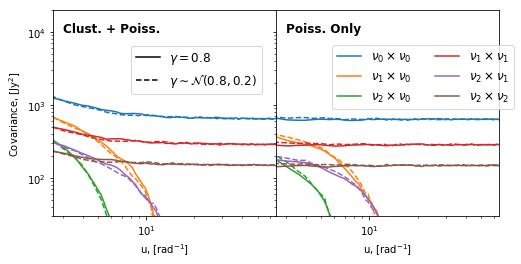

In [4]:
fig, ax = plt.subplots(1,2, figsize=(8,3.8),sharex=True,sharey=True,
                       gridspec_kw={"hspace":0,'wspace':0},
                       subplot_kw={"xscale":"log","yscale":'log',"ylim":(30,2e4),"xlim":(2.6,65)})

mpl.rcParams['font.size'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# Generate legend entries
ax[0].plot([0],[0],color="k",label=r"$\gamma = 0.8$")
ax[0].plot([0],[0],color="k",ls='--',label=r"$\gamma \sim \mathcal{N}(0.8,0.2)$")

k = 0
for i in range(3):
    for j in range(i,3):
        ax[0].plot(ubins,vis_covar_cf_ud[j,i],color="C%s"%k)
        ax[0].plot(ubins,vis_covar_cf_nd[j,i],color="C%s"%k, ls = '--')
        
        
        ax[1].plot(ubins,vis_covar_pf_ud[j,i],color="C%s"%k, label = r"$\nu_%s \times \nu_%s$"%(j,i))
        ax[1].plot(ubins,vis_covar_pf_nd[j,i],color="C%s"%k, ls='--')
        
        k += 1


ax[0].set_xlabel(r"u, [${\rm rad}^{-1}$]")
ax[1].set_xlabel(r"u, [${\rm rad}^{-1}$]")
ax[0].set_ylabel(r"Covariance, [${\rm Jy}^2$]")

ax[0].text(3,10000,"Clust. + Poiss.", fontweight="bold")
ax[1].text(3,10000,"Poiss. Only",fontweight='bold')

ax[0].legend(bbox_to_anchor=(0.25,0.55), bbox_transform=plt.gcf().transFigure)
ax[1].legend(ncol=2,bbox_to_anchor=(0.6, 0.495),
           bbox_transform=plt.gcf().transFigure)

plt.savefig("/home/steven/Documents/Projects/Foregrounds/clustering_counts_paper/figures/spec_index_dist.pdf")